# MNIST machine learning exercise

In this exercise we will demonstrate the use of Keras and Keras Tune to identify a feedforward neural network that best predicts the a handwritten digit. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# 1.0 Load and explore data (shouldn't need any transformations)

For repeatability, set random seed for both numpy and tensorflow.

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [3]:
from sklearn import datasets

mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [4]:
type(mnist)

sklearn.utils.Bunch

Notice that the dataset is stored in a Bunch type (see sklearn https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

We can view this dataset as similar to a dictionary; we can look at all the keys by doing the following:

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [6]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [7]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

If we want the number of images, we can use the len function.

In [8]:
print(len(mnist.data))

1797


And, for each image we have a target value

In [9]:
print(len(mnist.target))

1797


To identify any issues with data imbalance, let's look at the number of observations for each digit 

In [10]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

We can also look at this as a barplot to visualize the data balance...

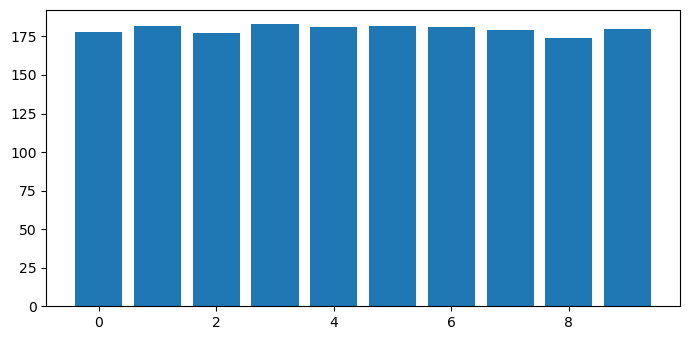

In [11]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

We can use matplotlib to display a sample of these images from the data.

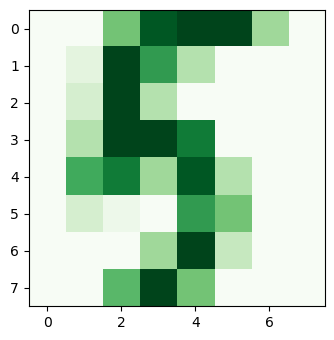

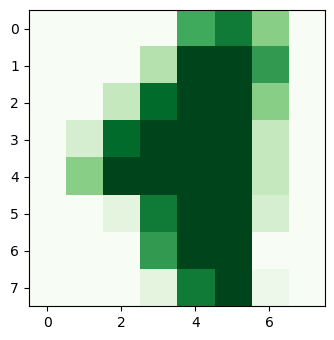

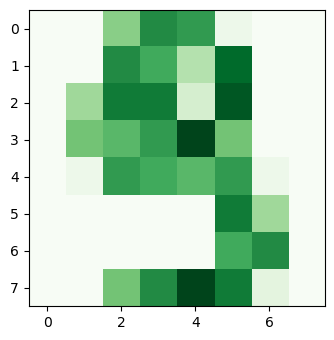

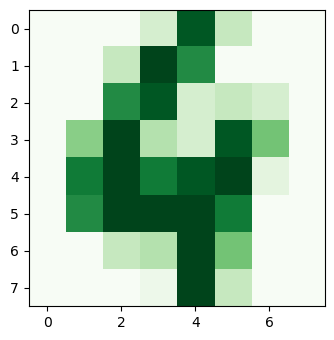

In [12]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
    plt.imshow(mnist.images[i], cmap='Greens')
    plt.show()

# 2.0 Model data using Keras sequential neural networks

Split data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

Create a unique log directory name (to store logs for later analysis using tensorboard)

## 2.2 Deep Network

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Input(64))
model.add(keras.layers.Dense(200, activation = 'relu'))
model.add(keras.layers.Dense(200, activation = 'relu'))
model.add(keras.layers.Dense(200, activation = 'relu'))
model.add(keras.layers.Dense(10, activation="softmax"))


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
_ = model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
45/45 [==============================] - 1s 9ms/step - loss: 0.8787 - accuracy: 0.7724 - val_loss: 0.2417 - val_accuracy: 0.9500
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9388 - val_loss: 0.1752 - val_accuracy: 0.9528
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1450 - accuracy: 0.9666 - val_loss: 0.1100 - val_accuracy: 0.9722
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.9763 - val_loss: 0.0926 - val_accuracy: 0.9806
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9833 - val_loss: 0.0870 - val_accuracy: 0.9806
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9937 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9910 - val_loss: 0.0796 - val_accuracy: 0.9806
Epoch 8/50
45/45 [==

In [18]:
c = model.evaluate(X_test,y_test)
loss = np.round(c[0],3)
Accuracy  = np.round(c[1],3)*100
print("loss:", loss)
print("Accuracy:", Accuracy)

12/12 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9833
loss: 0.059
Accuracy: 98.3


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               13000     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [20]:
y_pred = model.predict(X_test).argmax(axis=1)

12/12 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

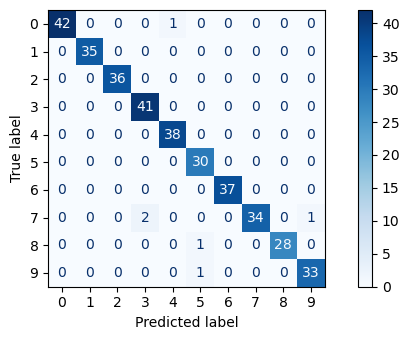

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp  = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.95      1.00      0.98        41
           4       0.97      1.00      0.99        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       1.00      0.97      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

